<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

<img src="images/machine learning pipline.png" style="width:500px;height:350px">

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

<img src="images/homepricetable.JPG" style="width:370px;height:250px">

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('homeprices.csv')

In [3]:
df.head()

area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000

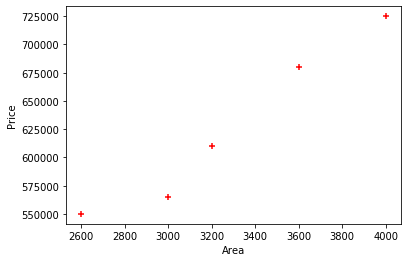

In [4]:
%matplotlib inline
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(df.area,df.price,color='red',marker='+')

In [5]:
x = df.drop('price',axis='columns')
x

area
0  2600
1  3000
2  3200
3  3600
4  4000

In [6]:
y = df.price
y

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [7]:
#create linear regression object
reg = linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**(1) Predict price of a home with area = 3300 sqr ft**

In [8]:
reg.predict([[3300]])

array([628715.75342466])

In [9]:
reg.coef_

array([135.78767123])

In [10]:
reg.intercept_

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

In [11]:
y = 135.78767123*3300+180616.43835616432

In [12]:
y

628715.7534151643

**(1) Predict price of a home with area = 5000 sqr ft**

In [13]:
reg.predict([[5000]])

array([859554.79452055])

In [14]:
reg.coef_

array([135.78767123])

In [15]:
reg.intercept_

180616.43835616432

In [16]:
y = 135.78767123*5000+180616.43835616432

In [17]:
y

859554.7945061643

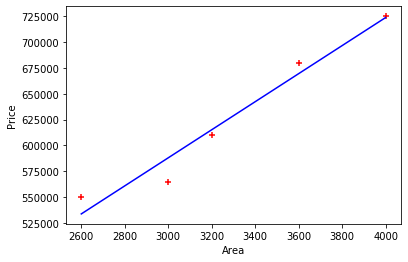

In [18]:
%matplotlib inline
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [19]:
df = {
    'area':[1000,6000,2300,1500,8000]
}
df = pd.DataFrame(df)

In [20]:
df

area
0  1000
1  6000
2  2300
3  1500
4  8000

In [21]:
df.to_csv('areas.csv')

In [22]:
data = pd.read_csv('areas.csv')
data

Unnamed: 0  area
0           0  1000
1           1  6000
2           2  2300
3           3  1500
4           4  8000

In [23]:
df_area = data.drop('Unnamed: 0',axis='columns')

In [24]:
df_area

area
0  1000
1  6000
2  2300
3  1500
4  8000

In [25]:
p = reg.predict(df_area)

In [26]:
p

array([ 316404.10958904,  995342.46575342,  492928.08219178,
        384297.94520548, 1266917.80821918])

In [27]:
df_area['prices'] = p
df_area

area        prices
0  1000  3.164041e+05
1  6000  9.953425e+05
2  2300  4.929281e+05
3  1500  3.842979e+05
4  8000  1.266918e+06

In [28]:
df_area.to_csv('prediction.csv',index=False)